# Acquisition and Prep Exercises

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from acquire import get_connection
import os

## Exercise 1
Acquire customer_id, monthly_charges, tenure, and total_charges from telco_churn database for all customers with a 2 year contract.

In [2]:
def new_telco_data():
    '''
    This function reads the telco churn data from CodeUp database into a df,
    write it to a csv file, and returns the df.
    '''
    sql_query = """
                SELECT customer_id, monthly_charges, tenure, total_charges
                FROM customers
                WHERE contract_type_id = 3
                """
    df = pd.read_sql(sql_query, get_connection('telco_churn'))
    df.to_csv('telco.csv')
    return df

In [3]:
def get_telco_data(cached=False):
    '''
    This function reads in telco churn data from CodeUp database if cached == False 
    or if cached == True reads in telco churn df from a csv file, returns df.
    '''
    if cached or os.path.isfile('telco.csv') == False:
        df = new_telco_data()
    else:
        df = pd.read_csv('telco.csv', index_col=0)
    return df

In [6]:
df = new_telco_data()

## Exercise 2
Walk through the steps above using your new dataframe. You may handle the missing values however you feel is appropriate.

In [7]:
df.head()

,customer_id,monthly_charges,tenure,total_charges
0,0013-SMEOE,109.70,71,7904.25
1,0014-BMAQU,84.65,63,5377.8
2,0016-QLJIS,90.45,65,5957.9
3,0017-DINOC,45.20,54,2460.55
4,0017-IUDMW,116.80,72,8456.75


In [8]:
df.shape

(1695, 4)

In [9]:
df.describe()

,monthly_charges,tenure
count,1695.000000,1695.000000
mean,60.770413,56.735103
std,34.678865,18.209363
min,18.400000,0.000000
25%,24.025000,48.000000
50%,64.350000,64.000000
75%,90.450000,71.000000
max,118.750000,72.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1695 entries, 0 to 1694
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_id      1695 non-null   object 
 1   monthly_charges  1695 non-null   float64
 2   tenure           1695 non-null   int64  
 3   total_charges    1695 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 53.1+ KB


**Takeaways**
1. Need to change total_charges into float
2. No null values

In [11]:
df.total_charges = pd.to_numeric(df.total_charges, errors = 'coerce')

In [12]:
df.total_charges.isnull().value_counts()

False    1685
True       10
Name: total_charges, dtype: int64

In [13]:
df[df.total_charges.isnull() == True]

,customer_id,monthly_charges,tenure,total_charges
234,1371-DWPAZ,56.05,0,NaN
416,2520-SGTTA,20.00,0,NaN
453,2775-SEFEE,61.90,0,NaN
505,3115-CZMZD,20.25,0,NaN
524,3213-VVOLG,25.35,0,NaN
678,4075-WKNIU,73.35,0,NaN
716,4367-NUYAO,25.75,0,NaN
726,4472-LVYGI,52.55,0,NaN
941,5709-LVOEQ,80.85,0,NaN
1293,7644-OMVMY,19.85,0,NaN


**Takeaways**
1. After changing total_charges into numeric there ended up being null values afterall
2. They are null because the tenure is 0 so will change total_charges to 0

In [14]:
df.total_charges.fillna(0, inplace = True) 

In [15]:
df.total_charges.isnull().value_counts()

False    1695
Name: total_charges, dtype: int64

In [16]:
df.describe()

,monthly_charges,tenure,total_charges
count,1695.000000,1695.000000,1695.000000
mean,60.770413,56.735103,3706.934336
std,34.678865,18.209363,2579.517834
min,18.400000,0.000000,0.000000
25%,24.025000,48.000000,1269.675000
50%,64.350000,64.000000,3593.800000
75%,90.450000,71.000000,5988.800000
max,118.750000,72.000000,8672.450000


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1695 entries, 0 to 1694
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_id      1695 non-null   object 
 1   monthly_charges  1695 non-null   float64
 2   tenure           1695 non-null   int64  
 3   total_charges    1695 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 53.1+ KB


### Plot distributions

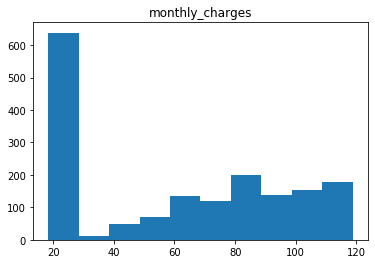

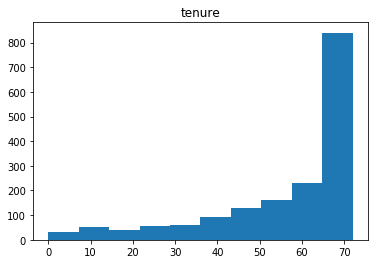

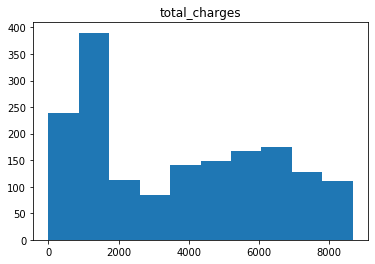

In [24]:
for col in ['monthly_charges', 'tenure', 'total_charges']:
    plt.hist(df[col])
    plt.title(col)
    plt.show()

### Boxplots

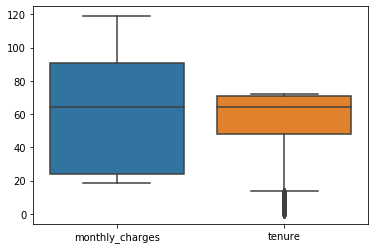

In [26]:
sns.boxplot(data = df[['monthly_charges', 'tenure']])
plt.show()

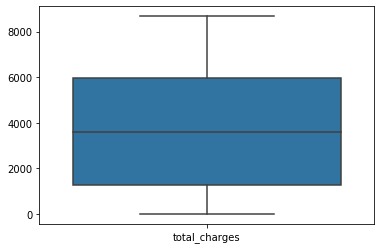

In [27]:
sns.boxplot(data = df[['total_charges']])
plt.show()

## Exercise 3
End with a python file wrangle.py that contains the function, wrangle_telco(), that will acquire the data and return a dataframe cleaned with no missing values.

In [29]:
def wrangle_telco(df):
    # use my aquire function to read data into a df from a csv file
    df = get_telco_data(cached)
    # changing total_charges into a float
    df.total_charges = pd.to_numeric(df.total_charges, errors = 'coerce')
    # changing null values into 0's because tenure equals 0
    df.total_charges.fillna(0, inplace = True) 
    return df